# LDA Model Visualizations with PCA/T-SNE

In [1]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle 

#sklearn
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA

# spacy
import spacy

from preprocessing_funcs import clean_tweet, get_hashtags, get_emojis

In [2]:
with open('../data_files/processed_tweets.pickle', 'rb') as read_file:
    df = pickle.load(read_file)

In [3]:
df.head()

,text,processed
0,#IslamKills Are you trying to say that there w...,islam kill try say terrorist attack europe ref...
1,"Clinton: Trump should’ve apologized more, atta...",clinton trump apologize attack little
2,RT @ltapoll: Who was/is the best president of ...,well president past retweet
3,RT @jww372: I don't have to guess your religio...,guess religion christmas aftermath
4,RT @Shareblue: Pence and his lawyers decided w...,pence lawyer decide official email public can see


In [5]:
proc_tweets = df.processed

vectorizer = CountVectorizer(token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True,
                             stop_words='english')

dtm = vectorizer.fit_transform(proc_tweets)
print(dtm.shape)

(203482, 77793)


## 4 Topic Model

In [7]:
lda_model = LatentDirichletAllocation(n_components=6, random_state=42)
lda_model.fit(dtm)

LatentDirichletAllocation(n_components=6, random_state=42)

In [10]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [9]:
import warnings
warnings.filterwarnings('ignore')

/Users/scrapfish/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
pyLDAvis.sklearn.prepare(lda_model, dtm, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.199205 -0.084625       1        1  29.235730
4     -0.157483  0.056028       2        1  16.446279
0      0.121096  0.014174       3        1  15.140650
5      0.119437 -0.140193       4        1  13.357486
2      0.050182  0.203090       5        1  13.032920
1      0.065973 -0.048474       6        1  12.786935, topic_info=          Term          Freq         Total Category  logprob  loglift
70279    trump  33138.000000  33138.000000  Default  30.0000  30.0000
29771  hillary  15514.000000  15514.000000  Default  29.0000  29.0000
12588  clinton  14663.000000  14663.000000  Default  28.0000  28.0000
18823   donald   8657.000000   8657.000000  Default  27.0000  27.0000
71145  twitter   5654.000000   5654.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
68511    think    552.659059   3725.587040   Topic6  -5.7608   0.1485
59844      say    595.137150   7365.310957   Topic6  -5.6868  -0.4590
46883     news    547.112301   4821.902313   Topic6  -5.7709  -0.1195
74413     want    499.920079   4144.473507   Topic6  -5.8611  -0.0583
39372     like    493.302567   5562.862315   Topic6  -5.8744  -0.3660

[414 rows x 6 columns], token_table=       Topic      Freq                 Term
term                                       
235        3  0.996751               abrams
390        3  0.001716              account
390        5  0.010298              account
390        6  0.988600              account
609        4  0.993220  addamovieruinamovie
...      ...       ...                  ...
76349      4  0.109462                world
76349      5  0.176356                world
76349      6  0.039528                world
76380      2  0.995617      worldofhashtags
77727      3  0.998170                   zu

[908 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 6, 3, 2])

**Topic Analysis**
1. Hillary Clinton (keywords: fbi, email, lie -- more negative slant)
2. Donald Trump (mostly about electing Trump, more positive slant)
3. General Twitter / Race (BLM is a big topic, some German bits in here ,too)
4. General Twitter / Violent News (police brutality, terrorism, murder, gun, refugee/islam) 
5. Conservative Twitter (pjnet, christian, ted cruz, god, conservative)
6. General Twitter (nothing too specific, just general chit chat)

In [12]:
doc_topic_matrix = lda_model.transform(dtm)

In [13]:
doc_topic_matrix

array([[0.01675371, 0.01673653, 0.01674448, 0.01678994, 0.01674582,
        0.91622953],
       [0.02795393, 0.02812606, 0.02782292, 0.86003962, 0.0280738 ,
        0.02798367],
       [0.0421523 , 0.04166824, 0.04206904, 0.04210744, 0.78980418,
        0.0421988 ],
       ...,
       [0.88001883, 0.02402086, 0.02383027, 0.02402325, 0.02413116,
        0.02397562],
       [0.0242457 , 0.02398096, 0.21105365, 0.69263077, 0.02391857,
        0.02417035],
       [0.42841329, 0.01870377, 0.49710718, 0.01858861, 0.01863595,
        0.0185512 ]])

In [26]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [27]:
terms = vectorizer.get_feature_names()

display_topics(lda_model, terms, 10)


Topic  0
right, black, know, live, people, thing, merkel, die, like, want

Topic  1
make, hate, phrase, happy, love, need, people, money, know, friend

Topic  2
twitter, conservative, patriot, journalist, network, america, like, christian, wake, cruz

Topic  3
trump, hillary, clinton, obama, say, politic, news, new, campaign, medium

Topic  4
trump, donald, real, president, america, make, debate, great, thank, maga

Topic  5
kill, midnight, police, islam, man, day, stop, shoot, people, guide


In [28]:
topic_cols = ['Race', 'General_Twitter', 'Conservative', 'Clinton', 'Trump', 'Violence']

In [29]:
doc_matrix = pd.DataFrame(doc_topic_matrix, columns=topic_cols)

In [30]:
doc_matrix.head()

,Race,General_Twitter,Conservative,Clinton,Trump,Violence
0,0.016754,0.016737,0.016744,0.016790,0.016746,0.916230
1,0.027954,0.028126,0.027823,0.860040,0.028074,0.027984
2,0.042152,0.041668,0.042069,0.042107,0.789804,0.042199
3,0.831839,0.034092,0.033443,0.033333,0.033442,0.033851
4,0.023893,0.023874,0.023912,0.880432,0.023982,0.023907


In [31]:
doc_matrix['label'] = doc_matrix.idxmax(axis=1)

In [33]:
doc_matrix['tweet'] = df['text']

In [35]:
doc_topic_df = doc_matrix[['tweet', 'label', 'Clinton', 'Trump', 'Race', 'Violence', 'Conservative', 'General_Twitter']]

In [39]:
doc_topic_df.iloc[:25, :]

,tweet,label,Clinton,Trump,Race,Violence,Conservative,General_Twitter
0,#IslamKills Are you trying to say that there w...,Violence,0.016790,0.016746,0.016754,0.916230,0.016744,0.016737
1,"Clinton: Trump should’ve apologized more, atta...",Clinton,0.860040,0.028074,0.027954,0.027984,0.027823,0.028126
2,RT @ltapoll: Who was/is the best president of ...,Trump,0.042107,0.789804,0.042152,0.042199,0.042069,0.041668
3,RT @jww372: I don't have to guess your religio...,Race,0.033333,0.033442,0.831839,0.033851,0.033443,0.034092
4,RT @Shareblue: Pence and his lawyers decided w...,Clinton,0.880432,0.023982,0.023893,0.023907,0.023912,0.023874
5,"@ModicaGiunta me, too!",Violence,0.083335,0.083336,0.083336,0.583321,0.083336,0.083337
6,RT @MDBlanchfield: You’ll never guess who twee...,Clinton,0.504071,0.220627,0.023953,0.023907,0.023988,0.203454
7,RT @100PercFEDUP: New post: WATCH: DIAMOND AND...,Clinton,0.523574,0.013932,0.013952,0.420596,0.013947,0.013999
8,RT @AriaWilsonGOP: 3 Women Face Charges After ...,Clinton,0.906744,0.018623,0.018589,0.018755,0.018599,0.018689
9,One of the ways to remind that #BlackLivesMatt...,Race,0.023873,0.023886,0.880660,0.023878,0.023834,0.023868


In [40]:
doc_topic_matrix = doc_topic_df[['Clinton', 'Trump', 'Race', 'Violence', 'Conservative', 'General_Twitter']].values

### 4 topic model reduced to 2D with PCA for visualization

In [41]:
%%time

pca = PCA(n_components=2)
pca_features = pca.fit_transform(doc_topic_matrix)

CPU times: user 2.2 s, sys: 261 ms, total: 2.47 s
Wall time: 242 ms


In [71]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']

def plot_PCA(data, target, target_names, colors):
    plt.figure(figsize=(10,10))
    for c, label in zip(colors, target_names):
        plt.scatter(data[target == label, 0], data[target == label, 1],
                   c=c, label=label, alpha=0.5, s=.75)
    lgnd = plt.legend(fontsize=10, prop={'size':12}, loc='upper right')
    lgnd.legendHandles[0]._sizes = [50]
    lgnd.legendHandles[1]._sizes = [50]
    lgnd.legendHandles[2]._sizes = [50]
    lgnd.legendHandles[3]._sizes = [50]
    lgnd.legendHandles[4]._sizes = [50]
    lgnd.legendHandles[5]._sizes = [50]
    lgnd.legendHandles[6]._sizes = [50]
    lgnd.legendHandles[7]._sizes = [50]

In [54]:
target = doc_topic_df['label']
target_names = list(target.unique())

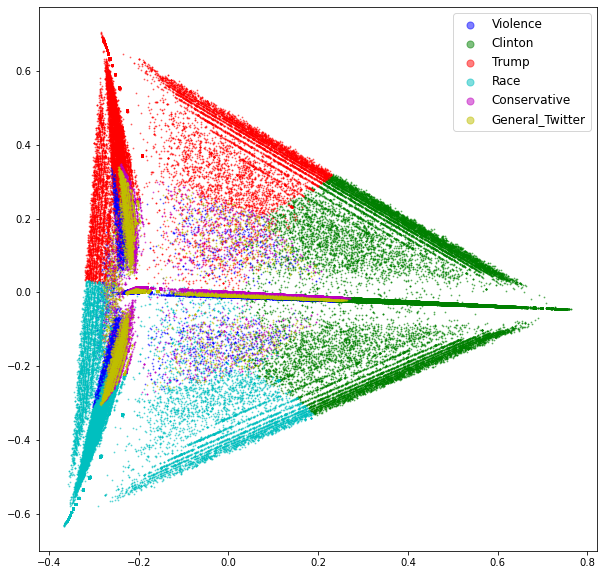

In [55]:
plot_PCA(pca_features, target=target, target_names=target_names, colors=colors)

### TSNE

In [48]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=37, init='pca')

In [49]:
# 6D --> 2D
tsne_lda = tsne_model.fit_transform(doc_topic_matrix)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 203482 samples in 0.235s...
[t-SNE] Computed neighbors for 203482 samples in 10.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 203482
[t-SNE] Computed conditional probabilities for sample 2000 / 203482
[t-SNE] Computed conditional probabilities for sample 3000 / 203482
[t-SNE] Computed conditional probabilities for sample 4000 / 203482
[t-SNE] Computed conditional probabilities for sample 5000 / 203482
[t-SNE] Computed conditional probabilities for sample 6000 / 203482
[t-SNE] Computed conditional probabilities for sample 7000 / 203482
[t-SNE] Computed conditional probabilities for sample 8000 / 203482
[t-SNE] Computed conditional probabilities for sample 9000 / 203482
[t-SNE] Computed conditional probabilities for sample 10000 / 203482
[t-SNE] Computed conditional probabilities for sample 11000 / 203482
[t-SNE] Computed conditional probabilities for sample 12000 / 203482
[t-SNE] Computed conditional probab

[t-SNE] Computed conditional probabilities for sample 120000 / 203482
[t-SNE] Computed conditional probabilities for sample 121000 / 203482
[t-SNE] Computed conditional probabilities for sample 122000 / 203482
[t-SNE] Computed conditional probabilities for sample 123000 / 203482
[t-SNE] Computed conditional probabilities for sample 124000 / 203482
[t-SNE] Computed conditional probabilities for sample 125000 / 203482
[t-SNE] Computed conditional probabilities for sample 126000 / 203482
[t-SNE] Computed conditional probabilities for sample 127000 / 203482
[t-SNE] Computed conditional probabilities for sample 128000 / 203482
[t-SNE] Computed conditional probabilities for sample 129000 / 203482
[t-SNE] Computed conditional probabilities for sample 130000 / 203482
[t-SNE] Computed conditional probabilities for sample 131000 / 203482
[t-SNE] Computed conditional probabilities for sample 132000 / 203482
[t-SNE] Computed conditional probabilities for sample 133000 / 203482
[t-SNE] Computed con

In [78]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']

def plot_tsne(data, target, target_names, colors):
    
    plt.figure(figsize=(10, 8))
    for c, label in zip(colors, target_names):
        plt.scatter(data[target == label, 0], data[target == label, 1], c=c, label=label, s=0.5, alpha=0.6)
    lgnd = plt.legend(fontsize=10, prop={'size':12}, loc='upper right')
    lgnd.legendHandles[0]._sizes = [50]
    lgnd.legendHandles[1]._sizes = [50]
    lgnd.legendHandles[2]._sizes = [50]
    lgnd.legendHandles[3]._sizes = [50]
    lgnd.legendHandles[4]._sizes = [50]
    lgnd.legendHandles[5]._sizes = [50]
    lgnd.legendHandles[6]._sizes = [50]
    lgnd.legendHandles[7]._sizes = [50]
    
    plt.show();

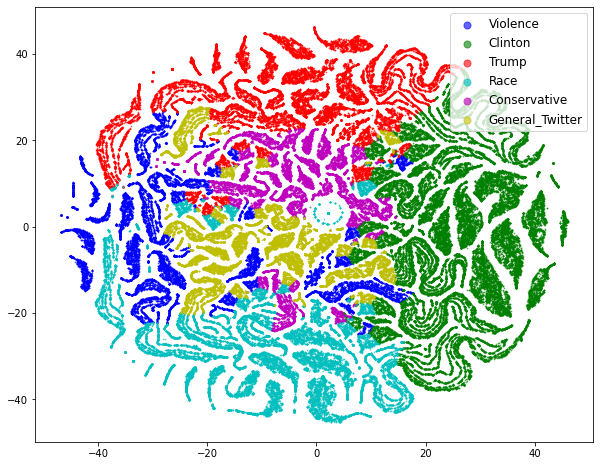

In [51]:
plot_tsne(tsne_lda, target, target_names, colors)

## 8 Topic Model

From the pyLdAvis notebook, 10 topics started to get too muddled. But 6 feels like not *quite* enough. Going to split the difference and try 8 and see what we get. 

In [52]:
lda_8 = LatentDirichletAllocation(n_components=8, random_state=42)
lda_8.fit(dtm)

LatentDirichletAllocation(n_components=8, random_state=42)

In [57]:
display_topics(lda_8, terms, 15)


Topic  0
right, know, like, want, people, thing, christmas, look, good, love, play, say, way, world, new

Topic  1
make, hate, phrase, happy, love, play, friend, dinner, ruin, money, people, baby, gt, need, account

Topic  2
twitter, conservative, patriot, journalist, network, america, christian, like, wake, cruz, good, idea, people, politician, party

Topic  3
hillary, clinton, trump, say, obama, politic, campaign, medium, news, election, email, new, poll, lie, donald

Topic  4
trump, donald, real, president, america, great, debate, make, maga, thank, tweet, think, potus, time, run

Topic  5
midnight, kill, police, man, islam, shoot, stop, day, guide, thanksgiving, survival, officer, watch, school, people

Topic  6
obama, merkel, die, muss, muslim, new, news, attack, terrorist, law, muslims, isis, break, state, post

Topic  7
trump, obama, black, white, live, gop, house, people, matt, say, democrat, politic, news, american, want


**Topics**

0. General_1
1. General_2
2. Conservative
3. Clinton
4. Trump
5. Violence
6. Terrorism
7. Obama

Really hard to get a theme between 0 and 1. 

In [58]:
topics_8 = ['Gen_1', 'Gen_2', 'Conservative', 'Clinton', 'Trump', 'Violence', 'Terrorism', 'Obama']

In [59]:
doc_topic_8 = lda_8.transform(dtm)

In [60]:
doc_matrix_8 = pd.DataFrame(doc_topic_8, columns=topics_8)

In [62]:
doc_matrix_8['label'] = doc_matrix_8.idxmax(axis=1)
doc_matrix_8['tweet'] = df['text']

In [63]:
topic_8_df = doc_matrix_8[['tweet', 'label', 
                          'Gen_1', 'Gen_2', 'Conservative', 'Clinton', 'Trump', 'Violence', 'Terrorism', 'Obama']]

In [64]:
topic_8_df

,tweet,label,Gen_1,Gen_2,Conservative,Clinton,Trump,Violence,Terrorism,Obama
0,#IslamKills Are you trying to say that there w...,Violence,0.012521,0.012505,0.012510,0.012517,0.012516,0.549145,0.375767,0.012518
1,"Clinton: Trump should’ve apologized more, atta...",Clinton,0.020859,0.020885,0.020838,0.853974,0.020880,0.020851,0.020862,0.020851
2,RT @ltapoll: Who was/is the best president of ...,Trump,0.031293,0.031254,0.031277,0.031275,0.781098,0.031275,0.031259,0.031269
3,RT @jww372: I don't have to guess your religio...,Gen_1,0.824787,0.025060,0.025015,0.025000,0.025004,0.025047,0.025062,0.025024
4,RT @Shareblue: Pence and his lawyers decided w...,Clinton,0.017876,0.017869,0.017868,0.874874,0.017883,0.017865,0.017870,0.017896
...,...,...,...,...,...,...,...,...,...,...
203477,"RT @AndreaChalupa: In intel circles, the story...",Clinton,0.327735,0.008934,0.008933,0.618657,0.008936,0.008933,0.008937,0.008935
203478,RT @KansasCityDNews: Tonganoxie police: Middle...,Violence,0.012508,0.012521,0.179606,0.012510,0.012503,0.397894,0.012504,0.359953
203479,RT @signsinyork: Getting the right #company lo...,Gen_1,0.874877,0.017870,0.017858,0.017878,0.017882,0.017874,0.017877,0.017884
203480,The Latest: Obama affirms continuity of ties w...,Terrorism,0.017878,0.017863,0.017877,0.017891,0.017873,0.017869,0.640226,0.252523


In [65]:
matrix_8 = doc_matrix_8[['Gen_1', 'Gen_2', 'Conservative', 'Clinton', 'Trump', 'Violence', 'Terrorism', 'Obama']].values

In [66]:
matrix_8

array([[0.01252112, 0.01250544, 0.01251023, ..., 0.54914467, 0.37576689,
        0.01251826],
       [0.02085924, 0.02088544, 0.02083811, ..., 0.02085061, 0.02086181,
        0.02085066],
       [0.03129282, 0.03125374, 0.03127684, ..., 0.03127536, 0.03125939,
        0.03126902],
       ...,
       [0.8748767 , 0.01786968, 0.01785848, ..., 0.01787386, 0.0178767 ,
        0.01788377],
       [0.01787777, 0.01786325, 0.01787702, ..., 0.01786914, 0.64022554,
        0.25252308],
       [0.74005486, 0.01389667, 0.1765181 , ..., 0.01394105, 0.01389642,
        0.01389845]])

### 8D --> 2D with PCA

In [67]:
pca_8 = PCA(n_components=2)
pca_features_8 = pca_8.fit_transform(matrix_8)

In [73]:
colors = ['red', 'darkorange', 'yellow', 'lawngreen', 
          'lightseagreen', 'dodgerblue', 'blueviolet', 'fuchsia']

In [69]:
target = topic_8_df['label']
target_names = list(target.unique())

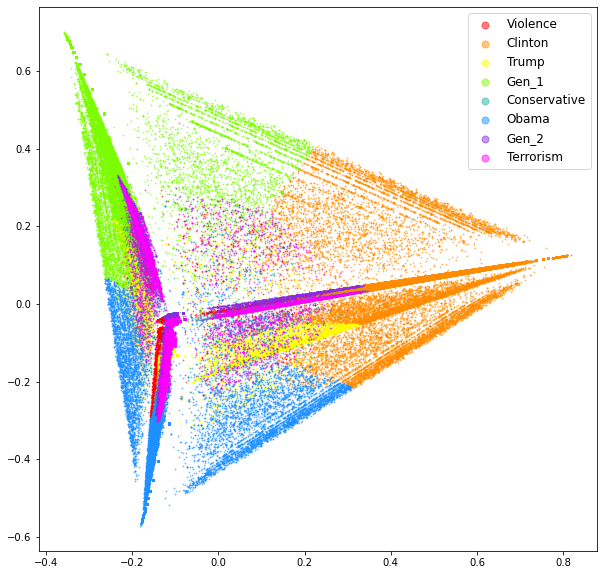

In [74]:
plot_PCA(pca_features_8, target=target, target_names=target_names, colors=colors)

### TSNE

In [75]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=37, init='pca')

In [76]:
# 8D --> 2D
tsne_lda = tsne_model.fit_transform(matrix_8)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 203482 samples in 0.265s...
[t-SNE] Computed neighbors for 203482 samples in 25.583s...
[t-SNE] Computed conditional probabilities for sample 1000 / 203482
[t-SNE] Computed conditional probabilities for sample 2000 / 203482
[t-SNE] Computed conditional probabilities for sample 3000 / 203482
[t-SNE] Computed conditional probabilities for sample 4000 / 203482
[t-SNE] Computed conditional probabilities for sample 5000 / 203482
[t-SNE] Computed conditional probabilities for sample 6000 / 203482
[t-SNE] Computed conditional probabilities for sample 7000 / 203482
[t-SNE] Computed conditional probabilities for sample 8000 / 203482
[t-SNE] Computed conditional probabilities for sample 9000 / 203482
[t-SNE] Computed conditional probabilities for sample 10000 / 203482
[t-SNE] Computed conditional probabilities for sample 11000 / 203482
[t-SNE] Computed conditional probabilities for sample 12000 / 203482
[t-SNE] Computed conditional probab

[t-SNE] Computed conditional probabilities for sample 125000 / 203482
[t-SNE] Computed conditional probabilities for sample 126000 / 203482
[t-SNE] Computed conditional probabilities for sample 127000 / 203482
[t-SNE] Computed conditional probabilities for sample 128000 / 203482
[t-SNE] Computed conditional probabilities for sample 129000 / 203482
[t-SNE] Computed conditional probabilities for sample 130000 / 203482
[t-SNE] Computed conditional probabilities for sample 131000 / 203482
[t-SNE] Computed conditional probabilities for sample 132000 / 203482
[t-SNE] Computed conditional probabilities for sample 133000 / 203482
[t-SNE] Computed conditional probabilities for sample 134000 / 203482
[t-SNE] Computed conditional probabilities for sample 135000 / 203482
[t-SNE] Computed conditional probabilities for sample 136000 / 203482
[t-SNE] Computed conditional probabilities for sample 137000 / 203482
[t-SNE] Computed conditional probabilities for sample 138000 / 203482
[t-SNE] Computed con

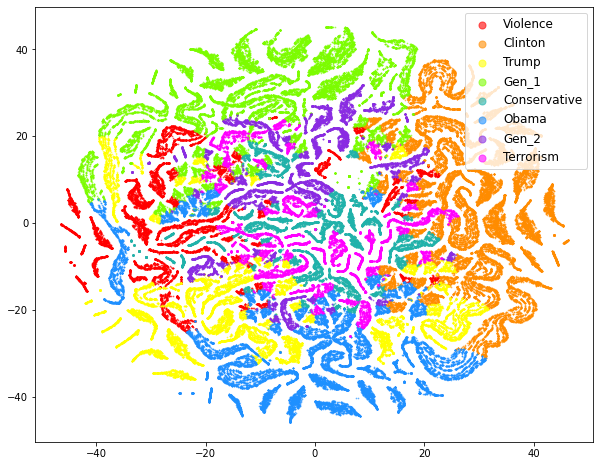

In [79]:
colors = ['red', 'darkorange', 'yellow', 'lawngreen', 
          'lightseagreen', 'dodgerblue', 'blueviolet', 'fuchsia']

plot_tsne(tsne_lda, target, target_names, colors)